In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/welding-x-ray/8.jpg
/kaggle/input/welding-x-ray/10.jpg
/kaggle/input/welding-x-ray/1.jpg
/kaggle/input/welding-x-ray/59.png
/kaggle/input/welding-x-ray/50.jpg
/kaggle/input/welding-x-ray/7.jpg
/kaggle/input/welding-x-ray/55.bmp
/kaggle/input/welding-x-ray/58.png
/kaggle/input/welding-x-ray/54.bmp
/kaggle/input/welding-x-ray/51.jpg
/kaggle/input/welding-x-ray/52.jpg
/kaggle/input/welding-x-ray/3.jpg
/kaggle/input/welding-x-ray/57.png
/kaggle/input/welding-x-ray/download.jpg
/kaggle/input/welding-x-ray/56.bmp
/kaggle/input/welding-x-ray/2.jpg


In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
from scipy import ndimage
import imageio.v3
import glob 

In [3]:
# Supported image file extensions
image_extensions = ['*.jpg', '*.jpeg', '*.png','*.bmp']
image_dir = "/kaggle/input/welding-x-ray"
image_list = []

for ext in image_extensions:
    image_files = glob.glob(os.path.join(image_dir, ext))
    image_list.extend(image_files)


# Load a single image and Display

Shape of the image:  (2092, 2581)
Data Type of the image:  uint8


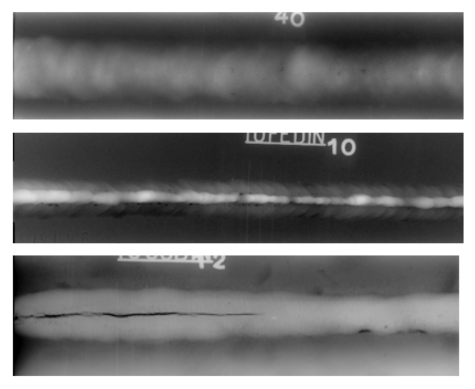

In [4]:
original_img = imageio.v3.imread(os.path.join(image_dir, "57.png"))
# Now see the shape and data type of the image
print(f"Shape of the image: ", original_img.shape)
print(f"Data Type of the image: ", original_img.dtype)
plt.imshow(original_img, cmap="gray")
plt.axis("off")
plt.show()

# Edge Detection on the X-ray Image in Image Processing
## Types of Edge Detection Algorithms
# 1.  Laplace Gaussian

###  implement the Laplace Gaussian operation on an X-ray image using SciPy ndimage’s gaussina_laplace() 
**compare both the original and filtered images**

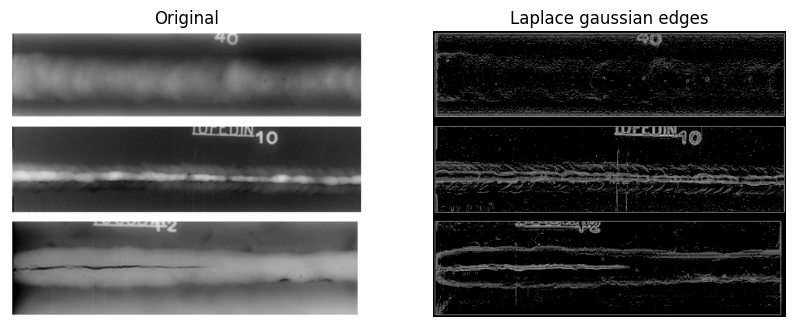

In [5]:
xray_LG = ndimage.gaussian_laplace(original_img,sigma=1)

#This function will create the plot of both images
def plot_xray(image1, image2, title1="Original", title2="Image2"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    axes[0].set_title(title1)
    axes[0].imshow(image1, cmap="gray")
    axes[1].set_title(title2)
    axes[1].imshow(image2, cmap="gray")
    for i in axes:
        i.axis("off")
    plt.show()

# Now see the results.
plot_xray(original_img,xray_LG, title2="Laplace gaussian edges")

# 2. Gaussian gradient magnitude? 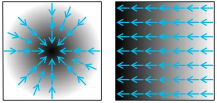
#### **first**, the algorithm applies the Gaussian filter on the image in both the x-axis and y-axis or horizontally and vertically
#### **Second**, The magnitude is calculated by taking both gradient directions’ square root or Euclidean distance.

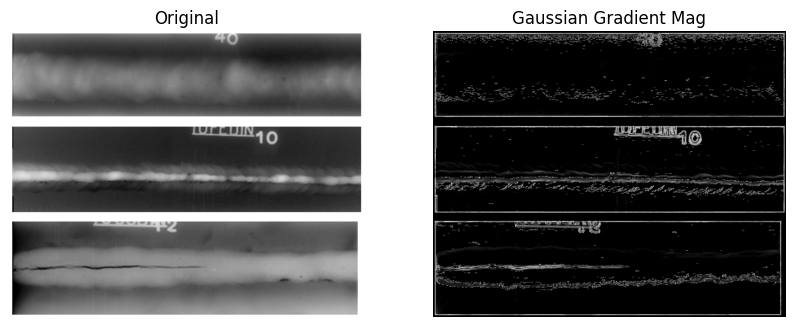

In [6]:
xray_GM = ndimage.gaussian_gradient_magnitude(original_img,sigma=2)

plot_xray(original_img, xray_GM, title2="Gaussian Gradient Mag")


# 3. Sobel Filter  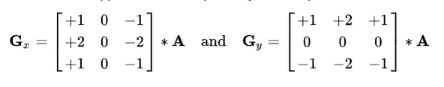
Implementation

***a***. To implement the Sobel filter,  use **ndimage’s sobel()** function. We must apply the Sobel filter on the x-axis and y-axis of the original image separately.

***b***. Then, we use **np.hypot()** to calculate euclidean distance of sobel_x and sobel_y

***c***. Last, **normalize the image**.

In [7]:
x_sb = ndimage.sobel(original_img, axis=0)
y_sb = ndimage.sobel(original_img, axis=1)

# taking magnitude
sobel_img = np.hypot(x_sb, y_sb)

# Normalization
sobel_img *= 255.0 / np.max(sobel_img)

Now, the image becomes **float16** format, so we must transform it into **float32** format for better compatibility with the matplotlib.


In [8]:
print("The data type - before: ", sobel_img.dtype)
sobel_img = sobel_img.astype("float32")
print("The data type - before: ", sobel_img.dtype)



The data type - before:  float16
The data type - before:  float32


### Let’s see the results

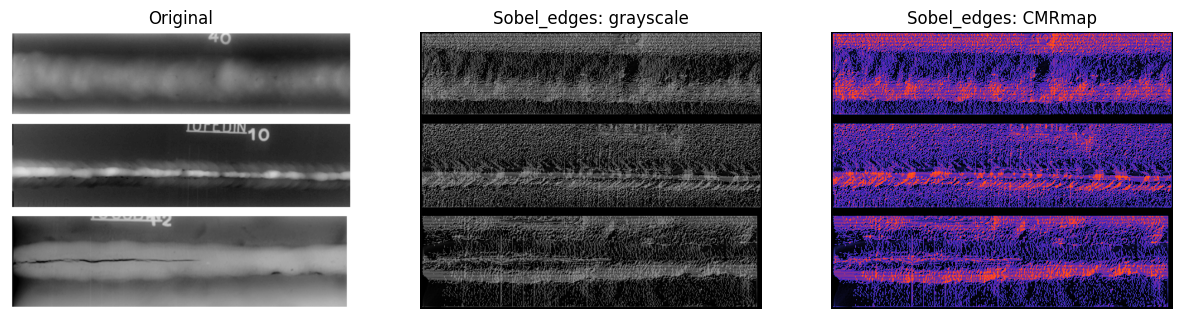

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Sobel_edges: grayscale")
axes[1].imshow(sobel_img, cmap="gray")
axes[2].set_title("Sobel_edges: CMRmap")
axes[2].imshow(sobel_img, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

# 4.  The Canny Filter
In general, the algorithm works as
#### **a. Noise Reduction** 
Here, it uses the 5 by 5 Gaussian kernel for convolution.
#### **b. Calculate Intensity Gradient** 
 It applies the Sobel filter on the smoothened image in the horizontal and vertical direction. After that, it calculates the gradient magnitude and gradient direction.
#### **c. Non-maximum Suppression**
It is a deep learning technique to remove the pixel which does not constitute the edge.
#### **d. Hysteresis Thresholding**
In this phase, the deep learning algorithm calculates the edges and those not. There are two threshold values, min_val and max_val, for the edges. 
# Implementation

In [10]:
#first, apply the Fourier Gaussian filter on the original image to get a smoother image.
fourier_gau = ndimage.fourier_gaussian(original_img,sigma=0.05)

#Second, we calculate both the directional gradient using Prewitt from Scipy ndimage.
x_prewitt = ndimage.prewitt(fourier_gau, axis=0)
y_prewitt = ndimage.prewitt(fourier_gau, axis=1)

#We calculate the gradient by taking the square root of both gradients. And then normalizing the image.
xray_canny = np.hypot(x_prewitt, y_prewitt)
xray_canny *= 255.0 / np.max(xray_canny)


#### The data type of the resulting image
### Let’s see the results

the data type - float64


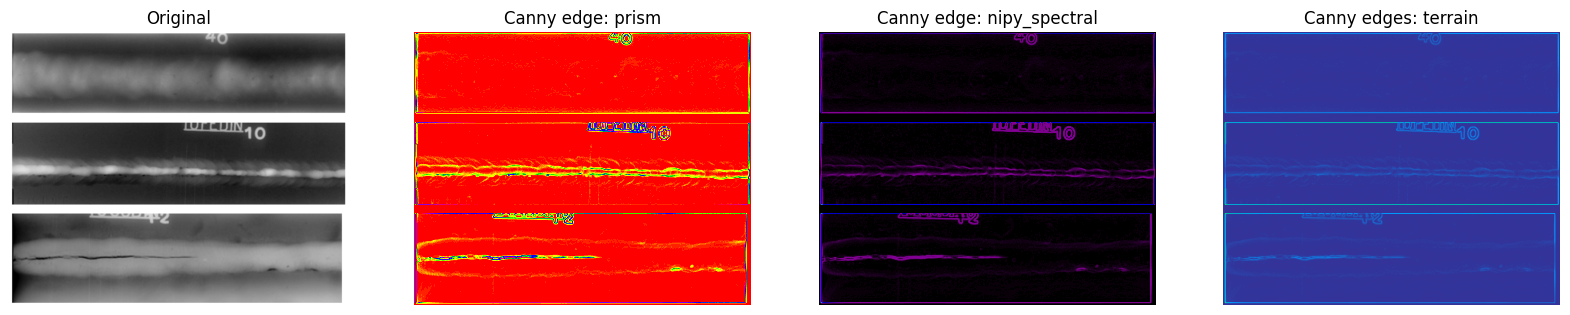

In [11]:
print(f"the data type - {xray_canny.dtype}")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Canny edge: prism")
axes[1].imshow(xray_canny, cmap="prism")
axes[2].set_title("Canny edge: nipy_spectral")
axes[2].imshow(xray_canny, cmap="nipy_spectral")
axes[3].set_title("Canny edges: terrain")
axes[3].imshow(xray_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

### How to Apply Masks to X-ray Images for Extracting Features-Based Image Processing from the Raw Images?
##### By masking certain pixels of an image, we can extract the features from the original images.

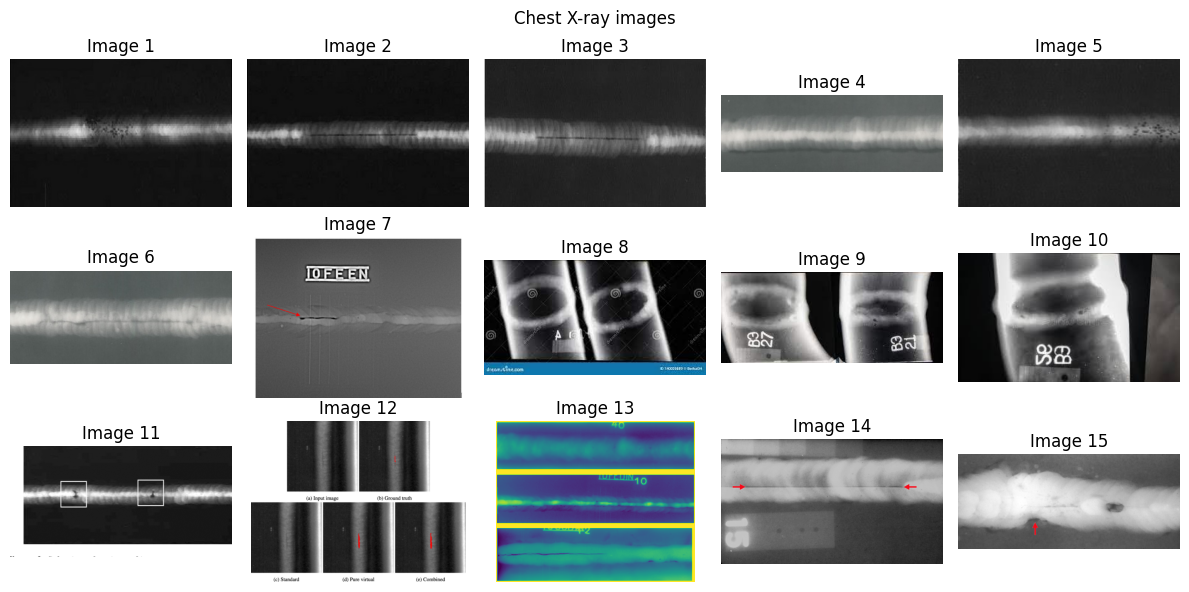

In [12]:
# Step 1: Create an image array 
images = [imageio.v3.imread(image_list[i]) for i in range(15)]

#Step 2: Plotting the Images
n_images = len(images)
n_rows = 3
n_cols = (n_images + 1) // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].axis("off")

for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

fig.suptitle("Chest X-ray images")
plt.tight_layout()
plt.show()

In [13]:
# Now, See some basic statistics of pixel values
print("The data type of the X-ray image is: ", original_img.dtype)
print("The minimum pixel value is: ", np.min(original_img))
print("The maximum pixel value is: ", np.max(original_img))
print("The average pixel value is: ", np.mean(original_img))
print("The median pixel value is: ", np.median(original_img))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  103.89495674746252
The median pixel value is:  89.0


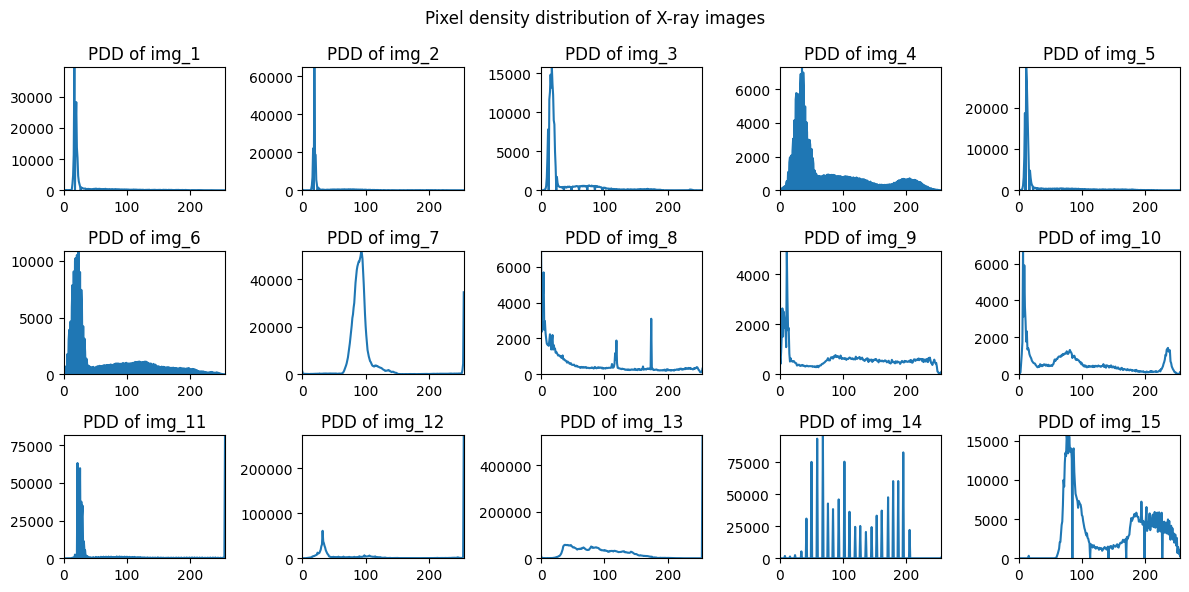

In [14]:
# Step 3: Plotting the Pixel density distribution of all the above images.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:

        pixel_int_dist = ndimage.histogram(images[i],
            min=np.min(images[i]),
            max=np.max(images[i]),
            bins=256)
        axes[i].plot(pixel_int_dist)
        axes[i].set_xlim(0, 255)
        axes[i].set_ylim(0, np.max(pixel_int_dist))
        axes[i].set_title(f"PDD of img_{i+1}")


fig.suptitle("Pixel density distribution of X-ray images")
plt.tight_layout()
plt.show()

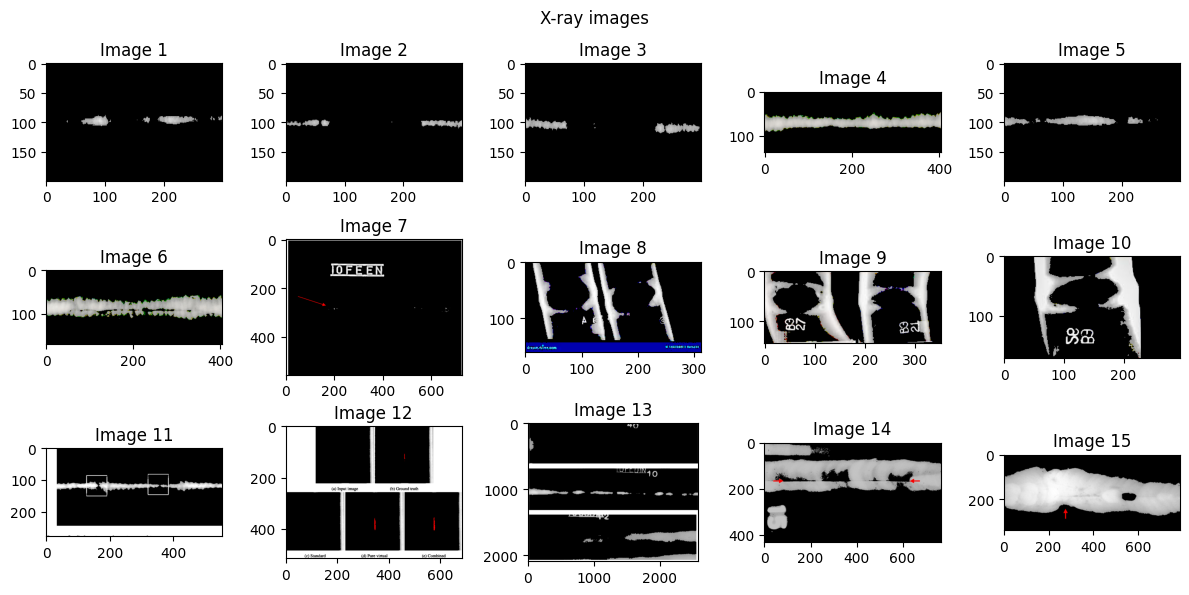

In [15]:
# Step 4: Extracting features from images using masking
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i in range(n_images):
    if i < n_images:
        noisy_image = np.where(images[i] >150, images[i], 0 )
        axes[i].imshow(noisy_image, cmap="gray")
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].axis("off")

for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

fig.suptitle("X-ray images")
plt.tight_layout()
plt.show()

## Good luck